# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

Text(0.5, 1.0, 'Temperatures of our server throughout the day')

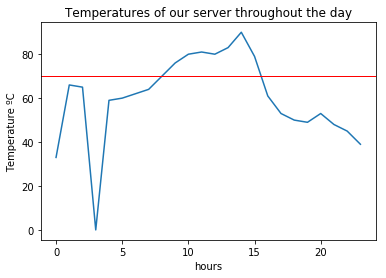

In [3]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


In [30]:
# assign a variable to the list of temperatures
list_of_temps = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]

# 1. Calculate the minimum of the list and print the value using print()

print("Temperatura minima {}ºC".format(min(list_of_temps)))

# 2. Calculate the maximum of the list and print the value using print()

print("\nTemperatur maxima {}ºC".format(max(list_of_temps)))

# 3. Items in the list that are greater than 70ºC and print the result
print("\nTemperaturas arriba de los 70ºC = ",[t for t in list_of_temps if t > 70])

# 4. Calculate the mean temperature throughout the day and print the result
print("\nTemperatura promedio durante el dia: {}ºC".format(sum(list_of_temps)/len(list_of_temps)))

# 5.1 Solve the fault in the sensor by estimating a value

#ESTIMAR VALOR FALTANTE OPCION 1:
without_faults1 = [sum(list_of_temps)/len(list_of_temps) if t == 0 else t for t in list_of_temps]

print("\nLista calculando valor faltante opcion 1 = ",without_faults1)

#ESTIMAR VALOR FALTANTE OPCION 2:

without_faults2 = []

for t in list_of_temps:
    if t == 0:
        i = list_of_temps.index(t)
        n1 = i - 1
        n2 = i + 1
        without_faults2.append(round(2/list_of_temps[n1] + list_of_temps[n2],2))
    else:
         without_faults2.append(t)
print("\nLista calculando valor faltante opcion 2 = ",without_faults2)
        

# 5.2 Update of the estimated value at 03:00 on the list


# Bonus: convert the list of ºC to ºFarenheit
#F = 1.8 * C + 32

F = [round(1.8*t+32,2) for t in list_of_temps]

print("\nLista de Celsius a Farenheit = ",F)

Temperatura minima 0ºC

Temperatur maxima 90ºC

Temperaturas arriba de los 70ºC =  [76, 80, 81, 80, 83, 90, 79]

Temperatura promedio durante el dia: 60.25ºC

Lista calculando valor faltante opcion 1 =  [33, 66, 65, 60.25, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]

Lista calculando valor faltante opcion 2 =  [33, 66, 65, 59.03, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]

Lista de Celsius a Farenheit =  [91.4, 150.8, 149.0, 32.0, 138.2, 140.0, 143.6, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.2, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]


## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


In [20]:
# Print True or False depending on whether you would change the cooling system or not
list_of_temps = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]

def change_cooling_system(temperatures):
    morethan4hours = 0
    for t in temperatures:
        if t >= 70: 
            morethan4hours+=1
            if morethan4hours == 4: 
                print(True,"More than 4 hours with temperatures greater than or equal to 70ºC")
                break
        else: morethan4hours = 0
            
        if t > 80: 
            print(True,"some temperature higher than 80ºC")
            break
        if sum(temperatures)/len(temperatures) > 65: 
            print(True, "Average was higher than 65ºC throughout the day If any of these three is met, the cooling system must be changed.")
            break
            
change_cooling_system(list_of_temps)

True More than 4 hours with temperatures greater than or equal to 70ºC


## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


In [24]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
list_of_temps = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]

hours_plus_than_70 = [list_of_temps.index(t) for t in list_of_temps if t > 70]

hours_plus_than_70

[9, 10, 11, 10, 13, 14, 15]

In [5]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, 
# not simply the sum of the whole set. Is this condition met?



In [75]:
# 3. Average of each of the lists (ºC and ºF). How they relate?
C = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
F = [91.4, 150.8, 149.0, 32.0, 138.2, 140.0, 143.6, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.2, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]

av_C = sum(C)/len(C)
av_F = sum(F)/len(F)

print("Promedio de lista en Celsius es",round(av_C,2))
print("Promedio de lista en Farenheit es",round(av_F,2))

#How they relate? entre su respectiva poblacion ambas representan lo mismo

Promedio de lista en Celsius es 60.25
Promedio de lista en Farenheit es 140.45


In [71]:
# 4. Standard deviation of each of the lists. How they relate?
import statistics as st

#entre su respectiva poblacion ambas representan lo mismo

print("Standard Deviation de lista en Celsius es",round(st.stdev(C),2))
print("Standard Deviation de lista en Farenheit es",round(st.stdev(F),2))

Standard Deviation de lista en Celsius es 19.7
Standard Deviation de lista en Farenheit es 35.46


In [68]:
sc.zscore(C), sc.zscore(F)

(array([-1.41296539,  0.29814866,  0.24629672, -3.12407943, -0.06481493,
        -0.01296299,  0.0907409 ,  0.19444478,  0.50555642,  0.81666807,
         1.02407583,  1.07592777,  1.02407583,  1.17963165,  1.54259524,
         0.97222389,  0.03888896, -0.37592657, -0.53148239, -0.58333433,
        -0.37592657, -0.63518627, -0.7907421 , -1.10185374]),
 array([-1.41296539,  0.29814866,  0.24629672, -3.12407943, -0.06481493,
        -0.01296299,  0.0907409 ,  0.19444478,  0.50555642,  0.81666807,
         1.02407583,  1.07592777,  1.02407583,  1.17963165,  1.54259524,
         0.97222389,  0.03888896, -0.37592657, -0.53148239, -0.58333433,
        -0.37592657, -0.63518627, -0.7907421 , -1.10185374]))

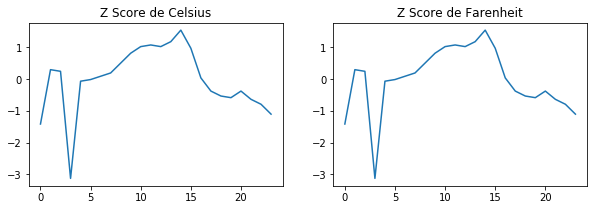

In [67]:
import scipy.stats as sc
import matplotlib.pyplot as plt
%matplotlib inline


plots = plt.figure(figsize=(10,3))
C_plot = plots.add_subplot(121)
F_plot = plots.add_subplot(122)

C_plot.plot(sc.zscore(C))
C_plot.title.set_text('Z Score de Celsius')

F_plot.plot(sc.zscore(F))
F_plot.title.set_text('Z Score de Farenheit')